# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
import scipy.stats
sns.set_style("whitegrid")
sns.set_context("poster")


In [2]:
from scipy.stats import linregress

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [3]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [8]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [9]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [10]:
print(boston.target.shape)

(506,)


In [11]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [12]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

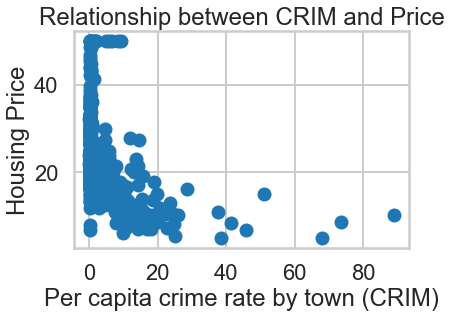

In [13]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

# your turn: describe relationship
The scatter plot above seems to follow a non-linear trend; specifically negatively exponential.  The outliers for the data are cases where the houses are the most expensive.  All the most expensive houses fall under the 12.0 per capita crime rate at the top of the plot

Text(0.5, 1.0, 'Relationship between RM and Price')

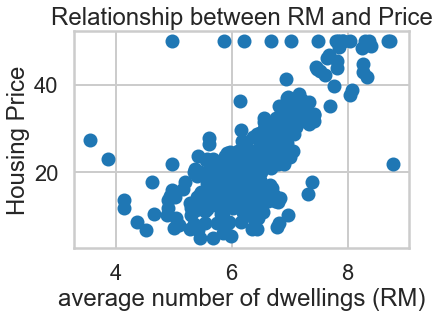

In [14]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("average number of dwellings (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

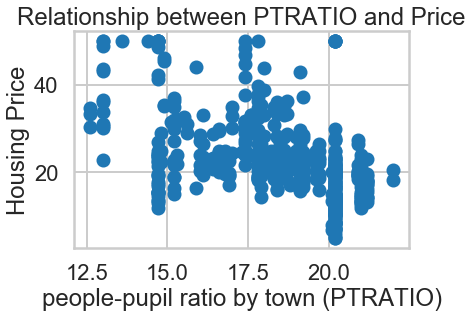

In [15]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("people-pupil ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

Text(0.5, 1.0, 'Relationship between AGE and Price')

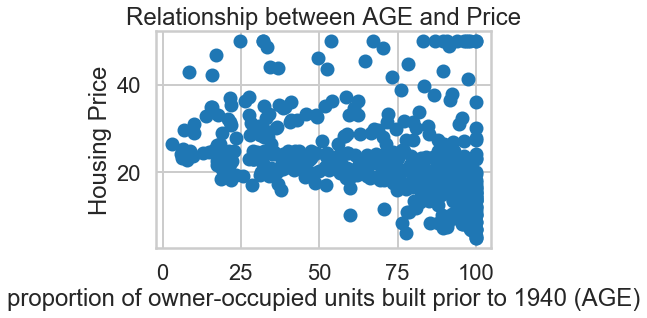

In [16]:
# your turn: create some other scatter plots
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("proportion of owner-occupied units built prior to 1940 (AGE)")
plt.ylabel("Housing Price")
plt.title("Relationship between AGE and Price")

Text(0.5, 1.0, 'Relationship between INDUS and Price')

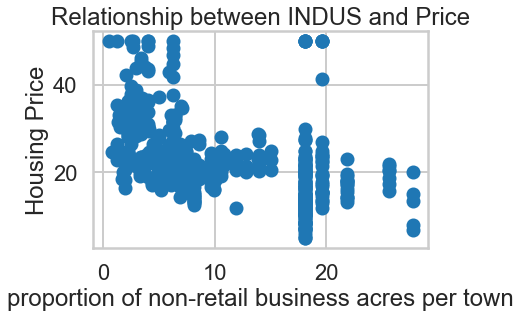

In [17]:
plt.scatter(bos.INDUS, bos.PRICE)
plt.xlabel("proportion of non-retail business acres per town")
plt.ylabel("Housing Price")
plt.title("Relationship between INDUS and Price")

There is a negative linear correlation with the amount of non-retail businesses and housing prices.  Areas with more industrial buildings/warehouse would probably not look the greatest as far as being aesthetically pleasing which probably drives the price down for that area.

Text(0.5, 1.0, 'Relationship between NOX and Price')

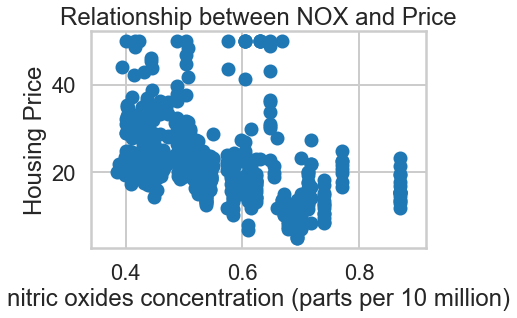

In [18]:
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("nitric oxides concentration (parts per 10 million)")
plt.ylabel("Housing Price")
plt.title("Relationship between NOX and Price")

From the plot, we can see a negative linear correlation between housing prices and nitric oxides concentration.  There is probably recognition within the greater boston area that this is a issue 

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

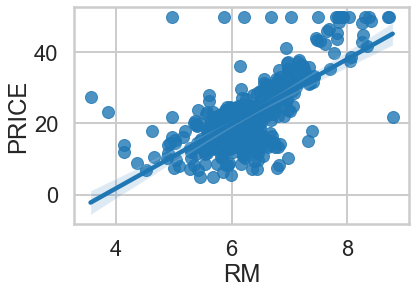

In [19]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

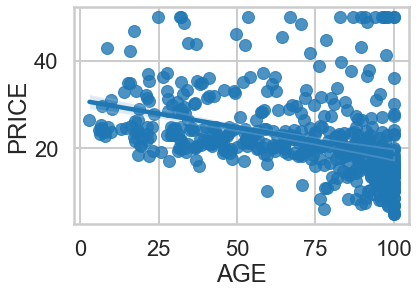

In [20]:
# your turn: create some other scatter plots
sns.regplot(y="PRICE", x="AGE", data=bos, fit_reg = True)

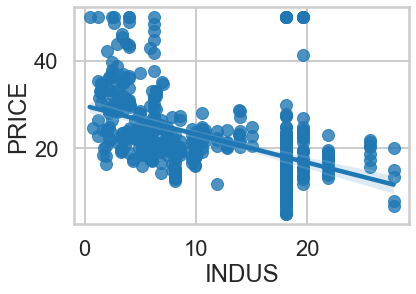

In [21]:
sns.regplot(y="PRICE", x="INDUS", data=bos, fit_reg = True)

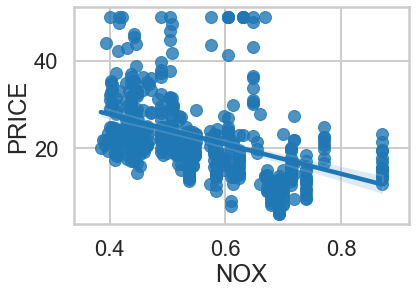

In [22]:
sns.regplot(y="PRICE", x="NOX", data=bos, fit_reg = True)

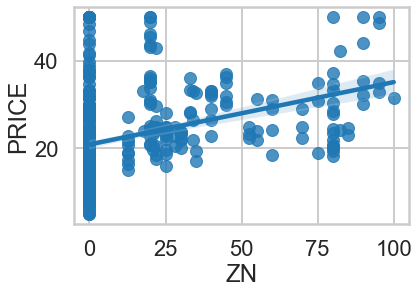

In [23]:
sns.regplot(y="PRICE", x="ZN", data=bos, fit_reg = True)

### Histograms
***


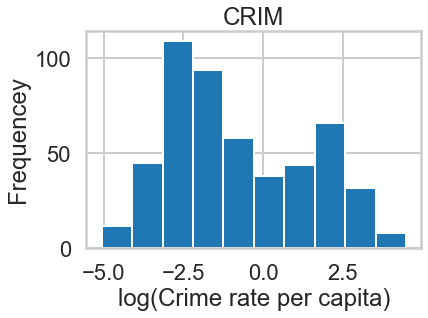

In [24]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("log(Crime rate per capita)")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

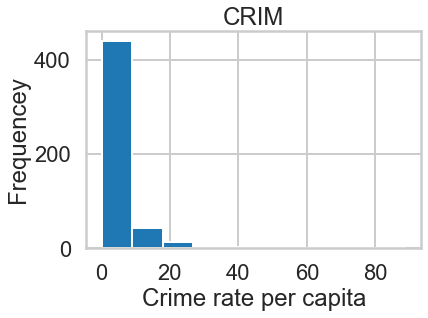

In [25]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

The reason for performing a log transformation on the data was to rescale the data to be a little easier to interpret the frequency of values

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [26]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           2.49e-74
Time:                        19:33:31   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

In [28]:
sns.set(rc = {'figure.figsize':(20,12)})

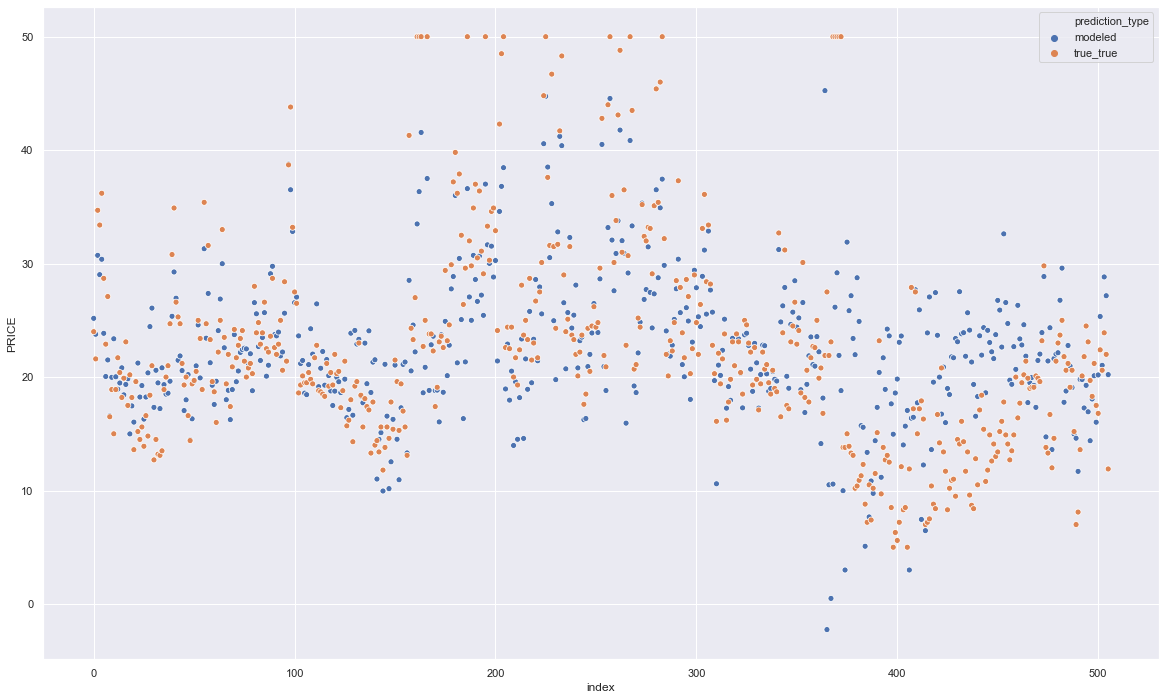

In [29]:
fitted = pd.DataFrame(m.fittedvalues).rename(columns={0:'PRICE'}).assign(prediction_type='modeled').reset_index(drop=False)
true = pd.DataFrame(bos.PRICE).assign(prediction_type='true_true').reset_index(drop=False)

t = pd.concat([fitted, true], axis=0)
# t.plot(x='index', y='PRICE',  kind='scatter', c='c', figsize=(20,15))
sns.scatterplot(data=t, x='index', y='PRICE', hue='prediction_type')

In [30]:
t

,index,PRICE,prediction_type
0,0,25.175746,modeled
1,1,23.774021,modeled
2,2,30.728032,modeled
3,3,29.025938,modeled
4,4,30.382152,modeled
...,...,...,...
501,501,22.400000,true_true
502,502,20.600000,true_true
503,503,23.900000,true_true
504,504,22.000000,true_true


The modeled predictions fall within the min and max values of the true outcomes and only crossing the lower boundary at times.

### Fitting Linear Regression using `sklearn`


In [31]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [32]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [33]:
lm.set_params(fit_intercept=False)
lm.fit(X, bos.PRICE)
lm.coef_

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

The reason for not fitting an intercept term in the model would be to imply that the model must run through the origin in order (0,0), essentially implying that when all the parameters are values of 0, the predicted price would also be 0.  If an intercept term were fit to the model then when all parameters are 0, the price would equate to the value of fitted intercept.

In this particular situation, I would suggest fitting an intercept term because if all the parameters in the data were 0, we should be able to safely assume that the property would have no price/value.

If the residuals have a constant variance and approximately a mean of zero, then yes it is enough

False, the data does not need to be normally distributed to use linear regression. Only the residuals need to be normally distributed.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [34]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 0.0


In [35]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [36]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.092897
1,ZN,0.048715
2,INDUS,-0.004060
3,CHAS,2.853999
4,NOX,-2.868436
5,RM,5.928148
6,AGE,-0.007269
7,DIS,-0.968514
8,RAD,0.171151
9,TAX,-0.009396


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [37]:
# first five predicted prices
lm.predict(X)[0:5]

array([29.09826353, 24.50227548, 31.22742641, 29.7071035 , 29.56479572])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

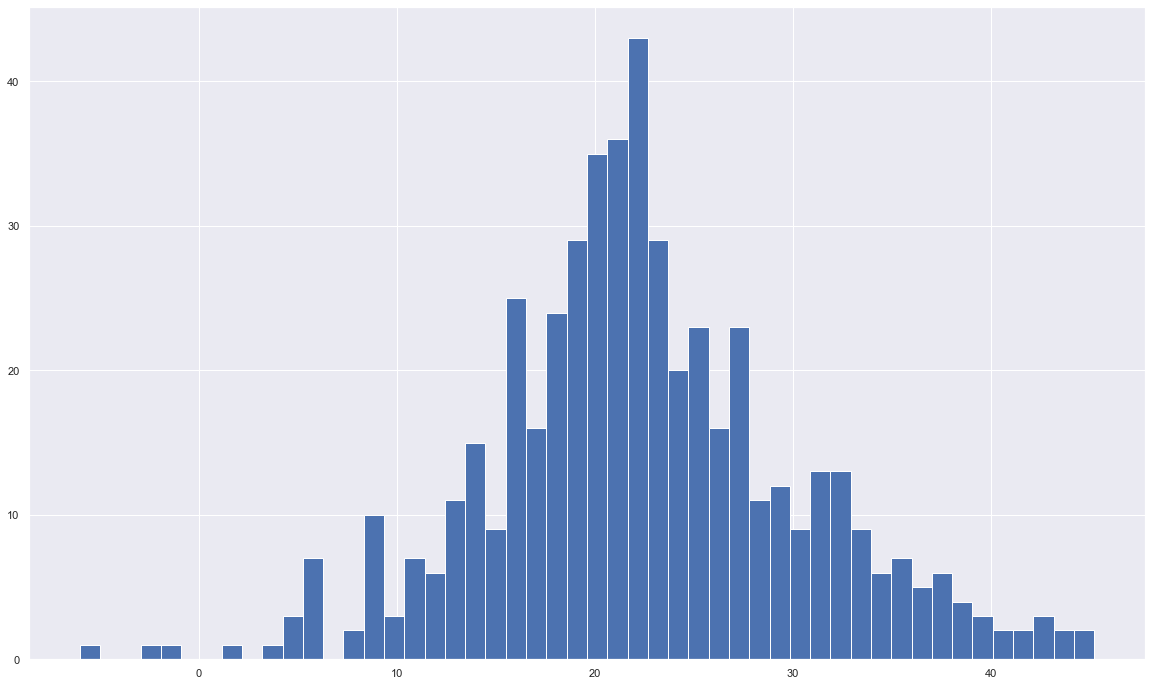

In [38]:
# your turn
plt.hist(lm.predict(X), bins=50);
# plt.title("CRIM")
# plt.xlabel("log(Crime rate per capita)")
# plt.ylabel("Frequencey")
# plt.show()

From the histogram, there is a normal distribution around 20.  One significant outlier can be found on left on the negative axis.  Before even looking at the data, I might assume that the particular found in the negative region has a higher concentration of nitric oxide and probably doesn't have many extra rooms or doesn't have a value for the CHAS field

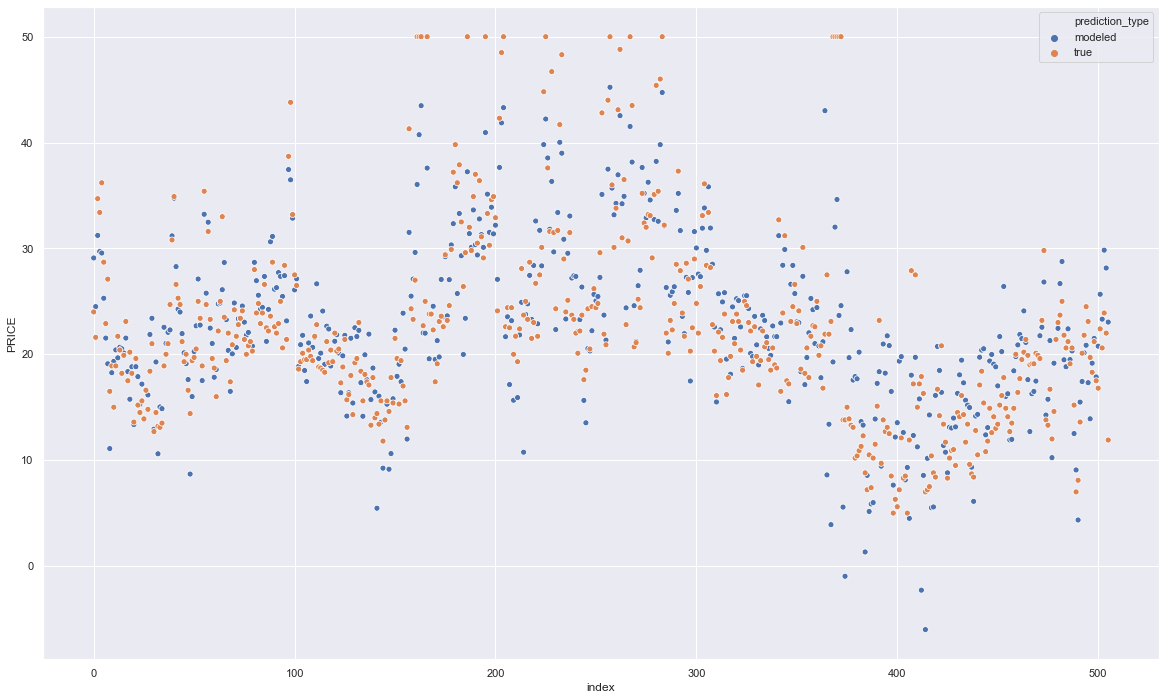

In [39]:
fitted = pd.DataFrame(lm.predict(X)).rename(columns={0:'PRICE'}).assign(prediction_type='modeled').reset_index(drop=False)
true = pd.DataFrame(bos.PRICE).assign(prediction_type='true').reset_index(drop=False)

t = pd.concat([fitted, true], axis=0).reset_index(drop=False)
# t.plot(x='index', y='PRICE',  kind='scatter', c='c', figsize=(20,15))
sns.scatterplot(data=t, x='index', y='PRICE', hue='prediction_type')

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [40]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

12228.046261044004


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [41]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31908.78970831641


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [42]:
lm = LinearRegression()
lm.fit(X=X.PTRATIO.values.reshape(-1, 1),y=bos.PRICE.values.reshape(-1, 1))
# ptratio

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
X.shape

(506, 13)

In [44]:
lm.coef_

array([[-2.1571753]])

In [45]:
lm.intercept_

array([62.34462747])

In [46]:
lm.score(X.loc[:, 'PTRATIO'].values.reshape(-1,1), bos.PRICE)

0.257847318009223

In [47]:
R_sq_1_var = np.sum((np.ravel(lm.predict(X.loc[:,['PTRATIO']])) - np.mean(bos.PRICE))**2) / (np.sum((bos.PRICE.values - np.ravel(lm.predict(X.loc[:,['PTRATIO']]), order='C'))**2) + np.sum((np.ravel(lm.predict(X.loc[:,['PTRATIO']])) - np.mean(bos.PRICE))**2))



The R**2 value here lets us know that the input parameters don't fully describe the relationship between the data and the model 

In [48]:
(R_sq_1_var / (1-R_sq_1_var)) * ((506 - 1 - 1) / 1)

175.10554287569528

In [49]:
RSS_1_var = np.sum((bos.PRICE - np.ravel(lm.predict(X.loc[:,['PTRATIO']])))**2)

In [50]:
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           1.61e-34
Time:                        19:33:33   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [51]:
# your turn
lm.set_params()
lm.fit(X=X.loc[:,['CRIM', 'RM', 'PTRATIO']], y=bos.PRICE.values.reshape(-1,1))
lm.coef_


array([[-0.20496083,  7.3804111 , -1.0695461 ]])

In [52]:
lm.score(X.loc[:, ['CRIM', 'RM', 'PTRATIO']], bos.PRICE)

0.5943412940723471

In [53]:
R_sq_3_var = np.sum((np.ravel(lm.predict(X.loc[:,['CRIM', 'RM', 'PTRATIO']])) - np.mean(bos.PRICE))**2) / (np.sum((bos.PRICE.values - np.ravel(lm.predict(X.loc[:,['CRIM', 'RM', 'PTRATIO']]), order='C'))**2) + np.sum((np.ravel(lm.predict(X.loc[:,['CRIM', 'RM', 'PTRATIO']])) - np.mean(bos.PRICE))**2))

R_sq_3_var

0.5943412940723469

In [54]:
RSS_3_var = np.sum((bos.PRICE - np.ravel(lm.predict(X.loc[:,['CRIM', 'RM', 'PTRATIO']])))**2)

Here the R**2 value is closer to 1.0 which indicates that the model is a little better at modeling the data vs the model we created earlier that only used the 1 feature

In [55]:
(R_sq_3_var / (1-R_sq_3_var)) * ((506 - 3 - 1) / 1)

735.493470901938

The most important variables that would exhibit the most significance would be the RM, NOX, and CHAS features

In [56]:
m = ols('PRICE ~ PTRATIO + RM + CRIM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           6.15e-98
Time:                        19:33:33   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [57]:
# your turn
lm.set_params()
lm.fit(X=X.loc[:,['CRIM', 'RM', 'PTRATIO', 'NOX', 'DIS']], y=bos.PRICE.values.reshape(-1,1))
lm.coef_


array([[ -0.15166644,   6.69320271,  -1.16864119, -27.25674316,
         -1.03511001]])

In [58]:
R_sq_5_var = lm.score(X=X.loc[:,['CRIM', 'RM', 'PTRATIO', 'NOX', 'DIS']], y=bos.PRICE.values.reshape(-1,1))
R_sq_5_var

0.6378439736718582

In [59]:
(R_sq_5_var / (1-R_sq_5_var)) * ((506 - 5 - 1) / 1)

880.6204057114342

In [60]:
RSS_5_var = np.sum((bos.PRICE - np.ravel(lm.predict(X.loc[:,['CRIM', 'RM', 'PTRATIO', 'NOX', 'DIS']])))**2)

In [61]:
RSS_3_var

17328.237120080248

In [62]:
RSS_3_var

17328.237120080248

In [63]:
(506 - 5 - 1)

500

In [64]:
F_stat = ((RSS_3_var - RSS_5_var) / (2))/(RSS_5_var / 500)
F_stat

30.03034357910572

In [65]:
m = ols('PRICE ~ PTRATIO + RM + CRIM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           6.15e-98
Time:                        19:33:33   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

In [66]:
m = ols('PRICE ~ PTRATIO + RM + CRIM + NOX + DIS',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     176.1
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          8.11e-108
Time:                        19:33:33   Log-Likelihood:                -1583.3
No. Observations:                 506   AIC:                             3179.
Df Residuals:                     500   BIC:                             3204.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.6319      5.033      4.298      0.0

The second model with more variables introduced had a smaller AIC by a bit


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

In [104]:
# Your turn.
mod = ols('PRICE ~ PTRATIO + RM + CRIM',bos).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           6.15e-98
Time:                        18:40:04   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

Text(0, 0.5, 'Residuals')

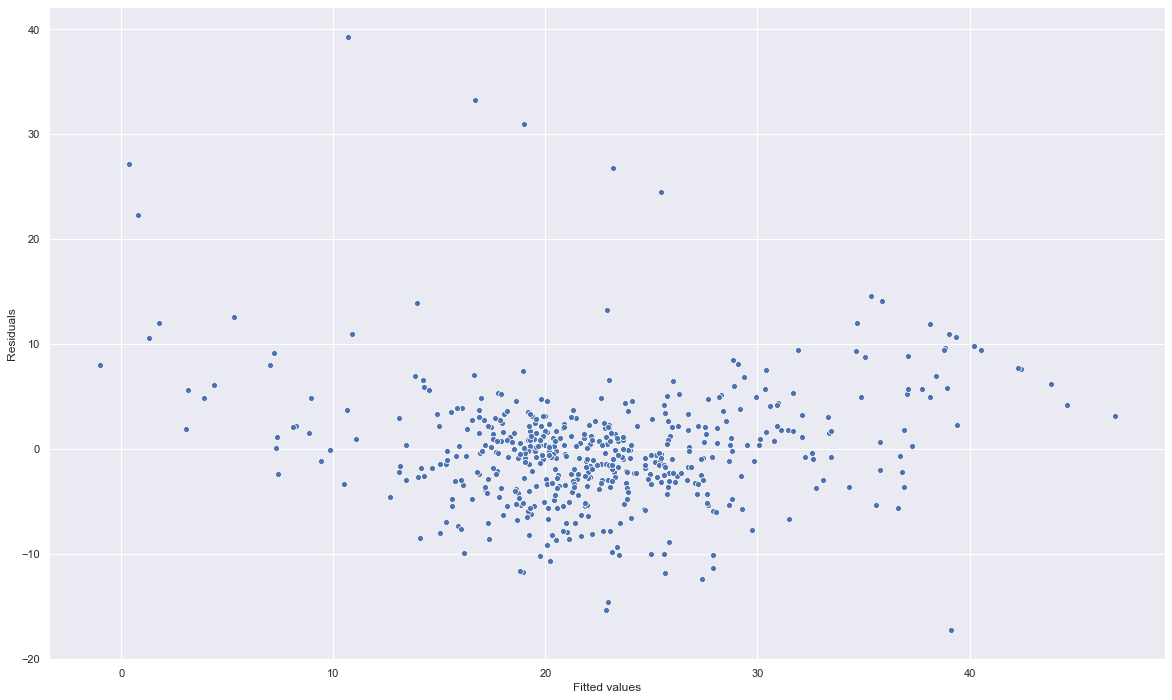

In [134]:
# residual = bos.PRICE - mod.fittedvalues
df = pd.concat([mod.fittedvalues, mod.resid], axis=1)
sns.scatterplot(data = df, x=0,y=1)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

There seems to be a clumping of the data and not so much a random distribution around the horizontal 0 axis.  From this it can be thought that the variance of the error terms are equal and there seem to be many outliers

<div class="span5 alert alert-info">
<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>



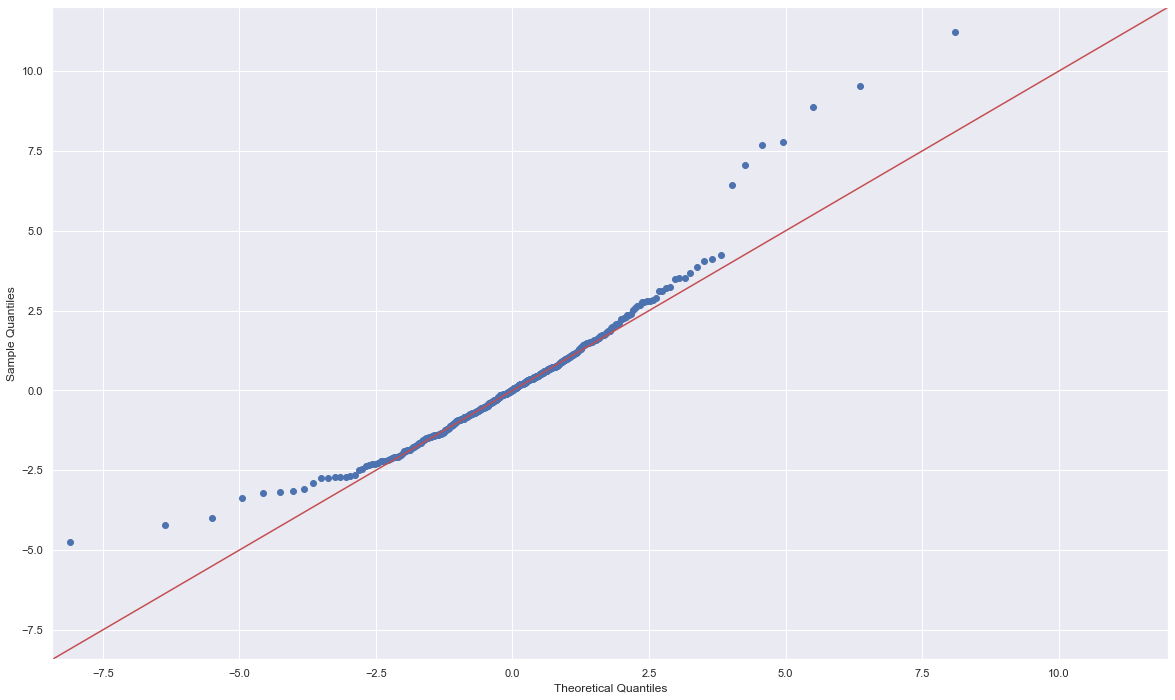

In [135]:
sm.qqplot(mod.resid, stats.t, fit=True, line='45');

The plot suggests that the data isn't normally distributed and we should reevaluate our model/distribution

<div class="span5 alert alert-info">
<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

</div>

The two plots together help showcase and get a perspective of the distribution of the residuals.  The fitted vs. residual helps show the clustering of the residuals, which could indicate something wrong with the mdoel.  The quantile plot helps show the residuals that aren't normally distributed and can be considered outliers of the data or help conclude that the distribution should be reevaluated

<div class="span5 alert alert-info">
<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>



In [137]:
outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,index,0,1
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0,28.790148,-4.790148
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,24.975397,-3.375397
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,2,30.614036,4.085964
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,3,28.270266,5.129734
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,4,29.362429,6.837571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,501,22.815041,-0.415041
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,502,19.327665,1.272335
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,503,25.642122,-1.742122
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,504,24.288879,-2.288879


Text(0.5, 1.0, 'Relationship between CRIM and Price For Outliers')

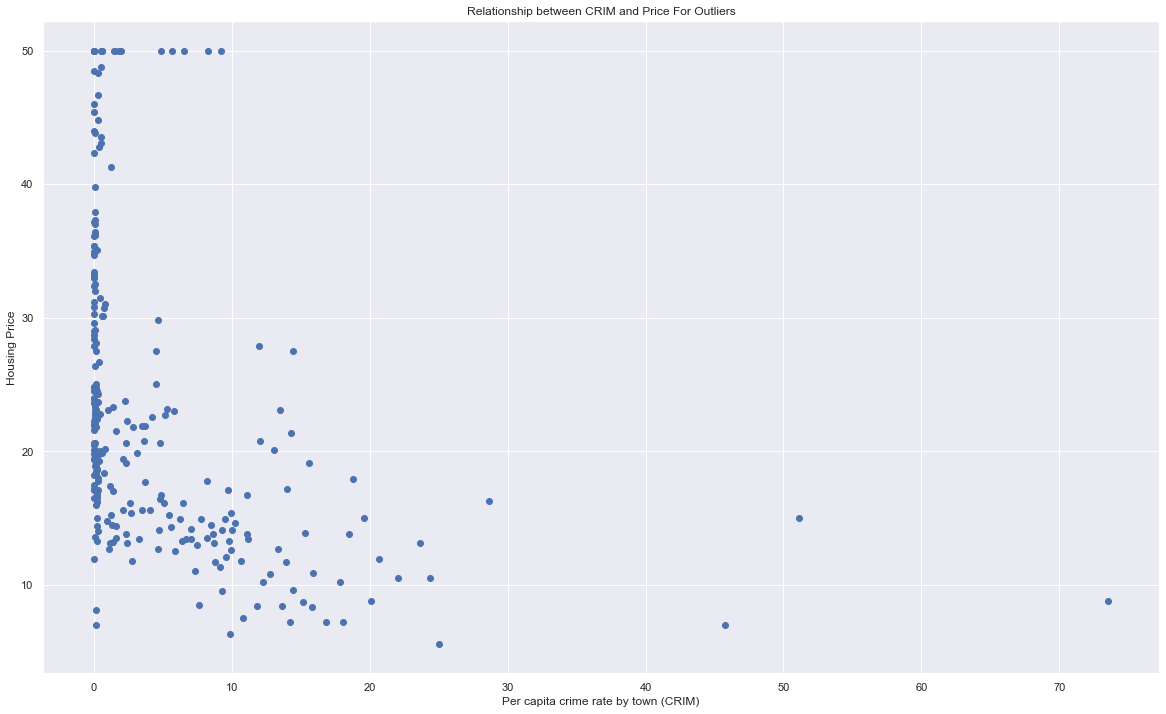

In [91]:
plt.scatter(outliers.CRIM, outliers.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price For Outliers")

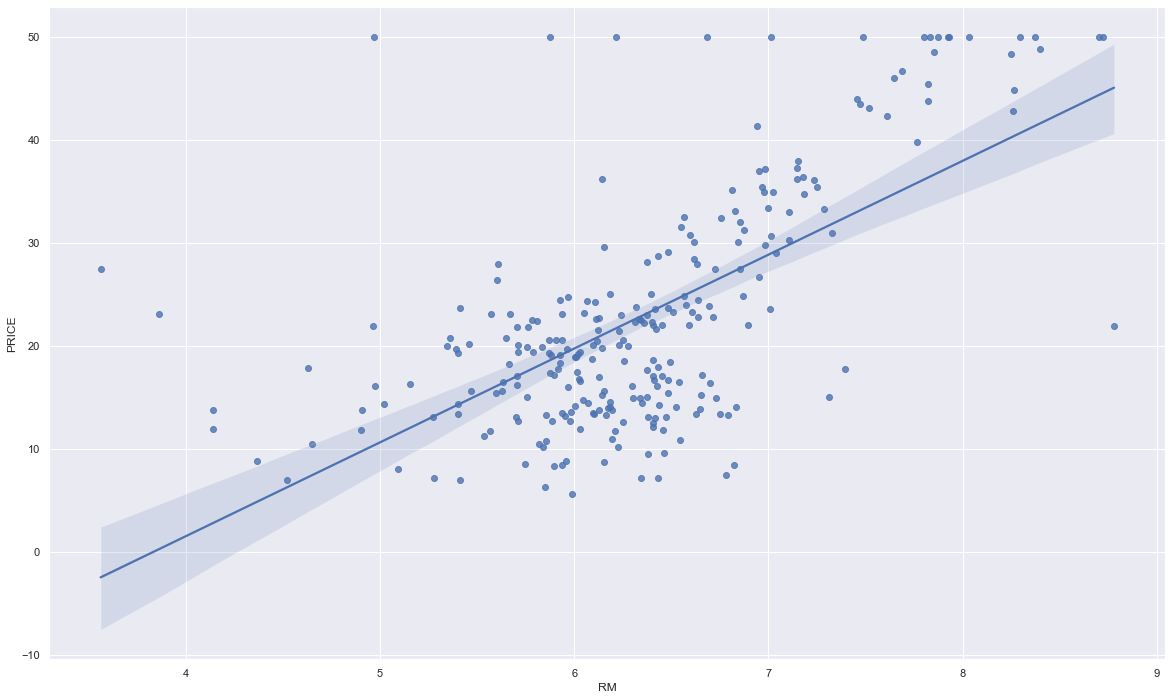

In [96]:
sns.regplot(y="PRICE", x="RM", data=outliers, fit_reg = True)

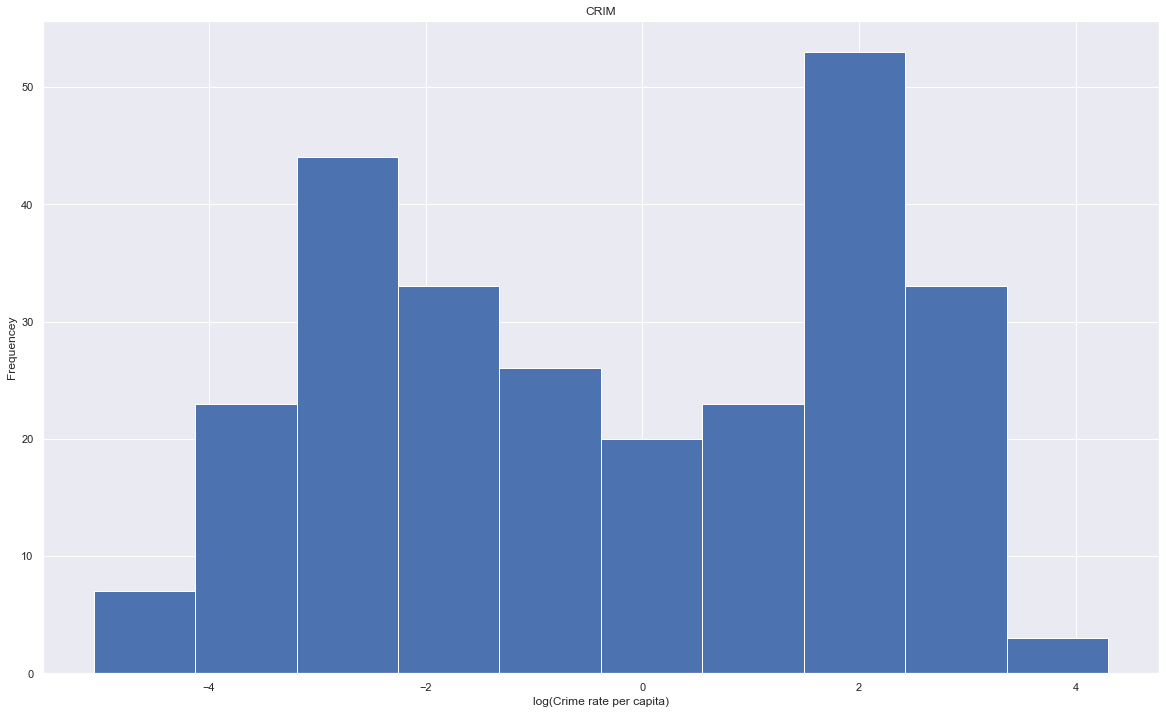

In [94]:
plt.hist(np.log(outliers.CRIM))
plt.title("CRIM")
plt.xlabel("log(Crime rate per capita)")
plt.ylabel("Frequencey")
plt.show()

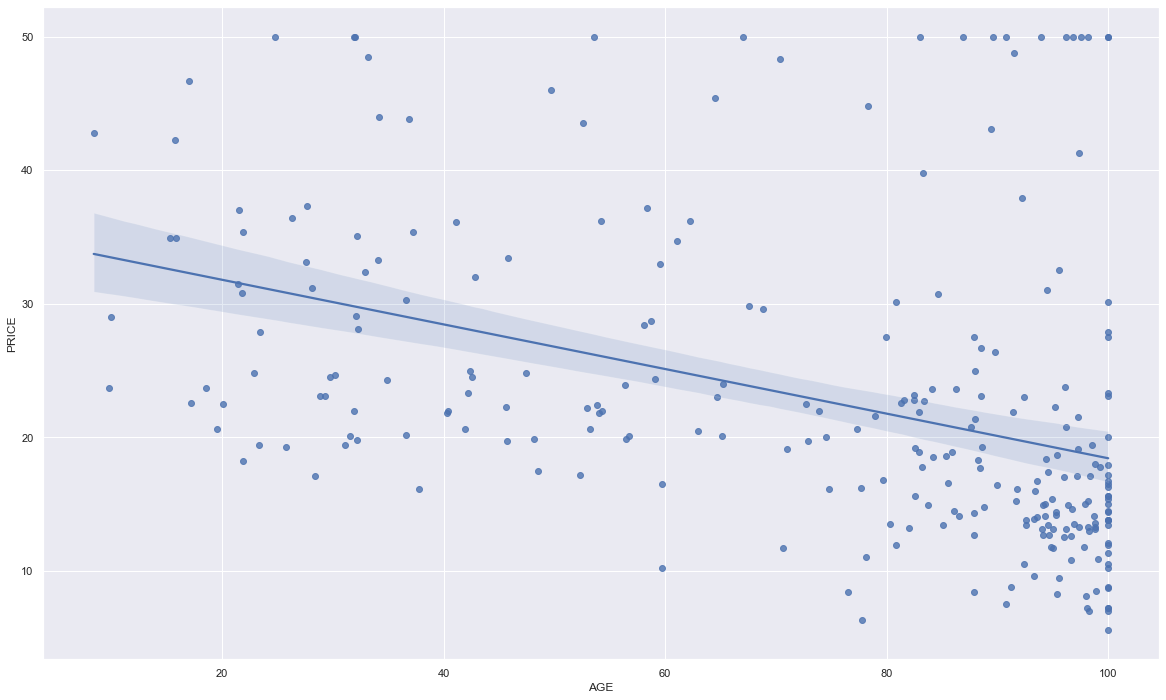

In [95]:
sns.regplot(y="PRICE", x="AGE", data=outliers, fit_reg = True)

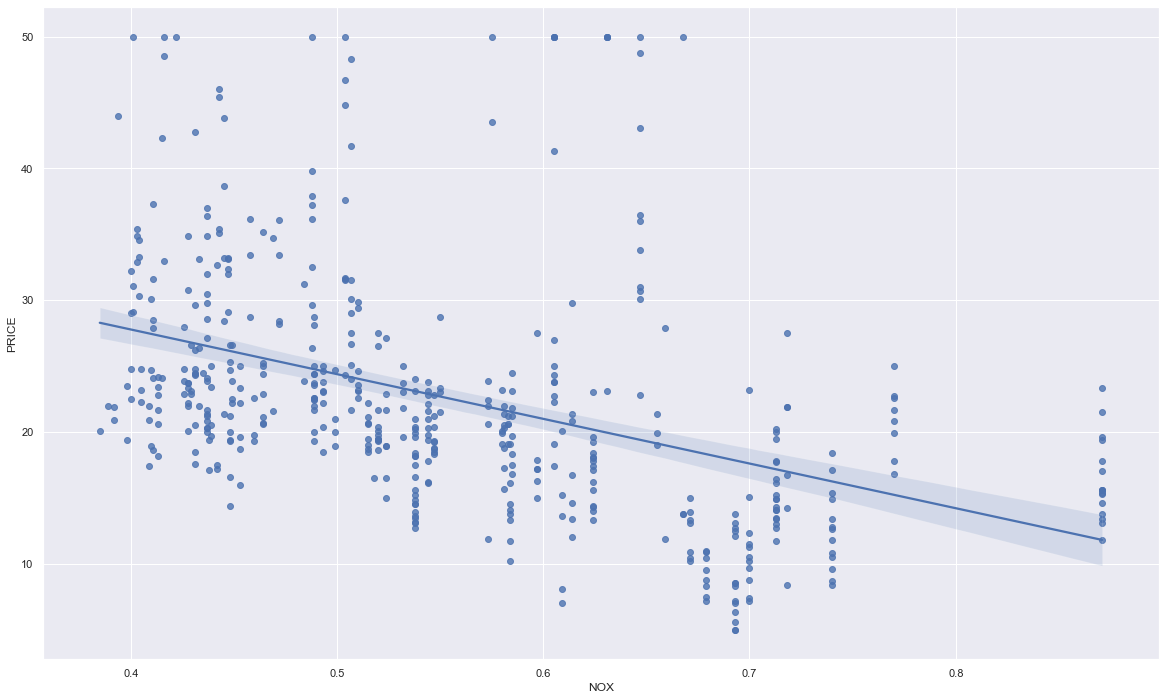

In [97]:
sns.regplot(y="PRICE", x="NOX", data=bos, fit_reg = True)

In [145]:
pred_meta = bos.merge(df.reset_index(), left_index=True, right_on='index')

In [196]:
pred_meta[(pred_meta.loc[:,1] <= 4) & (pred_meta.loc[:,1] >= -4)].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,index,0,1
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,2.388651,12.088589,10.192402,0.066066,0.529558,6.208649,64.284685,4.200813,7.699700,373.273273,18.542643,378.877027,11.827958,21.935736,233.780781,22.129884,-0.194148
std,7.908611,23.024812,6.470327,0.248771,0.102428,0.543324,27.631926,2.139221,7.417005,146.325867,2.012502,51.401254,5.970643,6.005792,142.295626,5.703851,2.066697
min,0.009060,0.000000,0.740000,0.000000,0.385000,4.880000,2.900000,1.416500,1.000000,187.000000,12.600000,3.500000,2.470000,5.000000,1.000000,3.046237,-3.974943
25%,0.072440,0.000000,5.190000,0.000000,0.445000,5.876000,41.500000,2.469900,4.000000,277.000000,17.400000,383.370000,7.220000,18.800000,105.000000,19.030423,-1.868094
50%,0.171340,0.000000,8.140000,0.000000,0.510000,6.140000,70.200000,3.671500,5.000000,307.000000,18.800000,392.900000,10.530000,21.400000,232.000000,21.815637,-0.176438
75%,0.761620,20.000000,18.100000,0.000000,0.583000,6.482000,89.300000,5.450900,7.000000,403.000000,20.200000,396.900000,14.810000,24.400000,338.000000,25.335551,1.408509
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.704000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000,504.000000,46.838953,3.912648


In [195]:
pred_meta[(pred_meta.iloc[:,-1] > 4) | (pred_meta.iloc[:,-1] < -4)].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,index,0,1
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,5.971227,9.968208,12.954566,0.075145,0.603080,6.430896,76.832948,3.013994,13.109827,475.537572,18.287861,313.936474,14.241272,23.682081,288.531792,23.308373,0.373708
std,9.381029,23.890384,7.233514,0.264390,0.124881,0.920293,27.356843,1.803569,9.850898,187.474107,2.429093,128.762718,8.778258,13.293204,147.311193,9.159020,9.606645
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,8.400000,1.129600,1.000000,193.000000,12.600000,0.320000,1.730000,5.600000,0.000000,-0.999617,-17.212383
25%,0.113290,0.000000,5.860000,0.000000,0.489000,5.957000,58.700000,1.752300,4.000000,307.000000,15.900000,302.760000,5.500000,13.500000,170.000000,18.705019,-6.619409
50%,2.155050,0.000000,18.100000,0.000000,0.605000,6.404000,90.800000,2.261600,6.000000,403.000000,20.100000,384.540000,14.000000,18.900000,301.000000,22.207597,-4.330167
75%,9.329090,0.000000,18.100000,0.000000,0.693000,6.943000,97.800000,3.945400,24.000000,666.000000,20.200000,394.120000,20.310000,33.100000,418.000000,28.661371,6.158070
max,73.534100,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,8.906700,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000,505.000000,44.599281,39.298836


In [181]:
pred_meta[(pred_meta.iloc[:,-1] > 10) | (pred_meta.iloc[:,-1] < -10)].sort_values(by=[1])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,index,0,1
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9,364,39.112383,-17.212383
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79,7.5,416,22.857826,-15.357826
419,11.81230,0.0,18.10,0.0,0.718,6.824,76.5,1.7940,24.0,666.0,20.2,48.45,22.74,8.4,419,22.967331,-14.567331
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0,10,27.390983,-12.390983
145,2.37934,0.0,19.58,0.0,0.871,6.130,100.0,1.4191,5.0,403.0,14.7,172.91,27.80,13.8,145,25.661217,-11.861217
401,14.23620,0.0,18.10,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32,7.2,401,18.920549,-11.720549
415,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05,7.2,415,18.803395,-11.603395
342,0.02498,0.0,1.89,0.0,0.518,6.540,59.7,6.2669,1.0,422.0,15.9,389.96,8.65,16.5,342,27.886281,-11.386281
429,9.33889,0.0,18.10,0.0,0.679,6.380,95.6,1.9682,24.0,666.0,20.2,60.72,24.08,9.5,429,20.197381,-10.697381
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05,9.6,436,19.753601,-10.153601


In [180]:
pred_meta[(pred_meta.loc[:,1] <= 10) & (pred_meta.loc[:,1] >= -10)].sort_values(by=[1])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,index,0,1
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,15.6,155,25.586719,-9.986719
375,19.60910,0.0,18.10,0.0,0.6710,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,15.0,375,24.978313,-9.978313
399,9.91655,0.0,18.10,0.0,0.6930,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3,399,16.182126,-9.882126
377,9.82349,0.0,18.10,0.0,0.6710,6.794,98.8,1.3580,24.0,666.0,20.2,396.90,21.24,13.3,377,23.153547,-9.853547
431,10.06230,0.0,18.10,0.0,0.5840,6.833,94.3,2.0882,24.0,666.0,20.2,81.33,19.69,14.1,431,23.392436,-9.292436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,1.22358,0.0,19.58,0.0,0.6050,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59,41.3,157,31.898376,9.401624
283,0.01501,90.0,1.21,1.0,0.4010,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0,283,40.555389,9.444611
233,0.33147,0.0,6.20,0.0,0.5070,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3,233,38.817506,9.482494
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5,203,38.858142,9.641858


In [190]:
pred_meta.TAX.value_counts()

666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
        ... 
285.0      1
198.0      1
256.0      1
244.0      1
313.0      1
Name: TAX, Length: 66, dtype: int64

In [205]:
pred_meta[(pred_meta.loc[:,1] <= 4) & (pred_meta.loc[:,1] >= -4)].groupby(["TAX", "PRICE"])[0].count().sort_values(ascending=False)[:20]

TAX    PRICE
666.0  19.1     3
       19.9     3
       5.0      2
307.0  18.2     2
384.0  19.5     2
304.0  19.4     2
666.0  20.6     2
403.0  23.8     2
666.0  21.4     2
300.0  23.7     2
666.0  10.4     2
277.0  24.4     2
666.0  25.0     2
384.0  18.6     1
       20.1     1
       19.8     1
       19.4     1
       19.3     1
348.0  24.1     1
352.0  17.5     1
Name: 0, dtype: int64

In [204]:
pred_meta[(pred_meta.iloc[:,-1] > 4) | (pred_meta.iloc[:,-1] < -4)].groupby(["TAX", "PRICE"])[0].count().sort_values(ascending=False)[:20]

TAX    PRICE
666.0  50.0     5
403.0  50.0     4
       15.6     3
666.0  13.4     3
       13.8     3
       14.1     3
       14.9     3
       16.1     2
300.0  22.0     2
666.0  10.2     2
       8.8      2
       13.1     2
       13.3     2
       8.4      2
       15.0     2
311.0  18.9     2
666.0  7.2      2
       21.9     2
       20.8     2
       27.5     2
Name: 0, dtype: int64

## The main outliers seem to come from the data points that have a value of 50, which seems to be the cap for the PRICE column

<div class="span5 alert alert-info">
<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

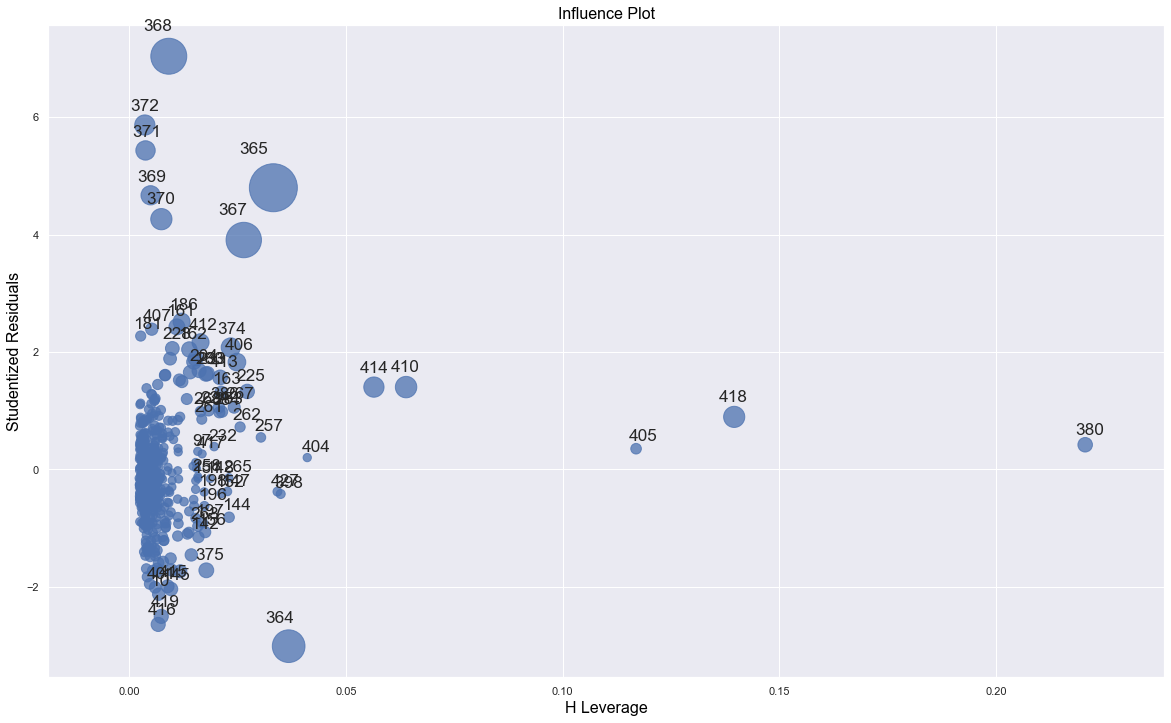

In [206]:
sm.graphics.influence_plot(mod);

In [209]:
pred_meta[(pred_meta.iloc[:,-1] > 10) | (pred_meta.iloc[:,-1] < -10)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,index,0,1
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0,10,27.390983,-12.390983
145,2.37934,0.0,19.58,0.0,0.871,6.130,100.0,1.4191,5.0,403.0,14.7,172.91,27.80,13.8,145,25.661217,-11.861217
161,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0,161,35.878935,14.121065
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0,162,38.113084,11.886916
166,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0,166,39.014237,10.985763
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,396.90,9.45,36.2,181,22.922503,13.277497
186,0.05602,0.0,2.46,0.0,0.488,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0,186,35.375893,14.624107
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0,195,39.345739,10.654261
228,0.29819,0.0,6.20,0.0,0.504,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92,46.7,228,34.683916,12.016084
342,0.02498,0.0,1.89,0.0,0.518,6.540,59.7,6.2669,1.0,422.0,15.9,389.96,8.65,16.5,342,27.886281,-11.386281


## The high leverage points are probably attributed to the PRICE max for the rows with 50.0

<div class="span5 alert alert-info">
<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>

In [212]:
removed_bad = bos[bos.PRICE != 50]

In [213]:
X, y = removed_bad.drop(columns=['PRICE']), removed_bad['PRICE']

In [214]:
m = ols('PRICE ~ PTRATIO + RM + CRIM',removed_bad).fit()

In [216]:
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     283.8
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.10e-106
Time:                        21:51:34   Log-Likelihood:                -1457.4
No. Observations:                 490   AIC:                             2923.
Df Residuals:                     486   BIC:                             2940.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0106      3.327      0.304      0.7

Text(0, 0.5, 'Residuals')

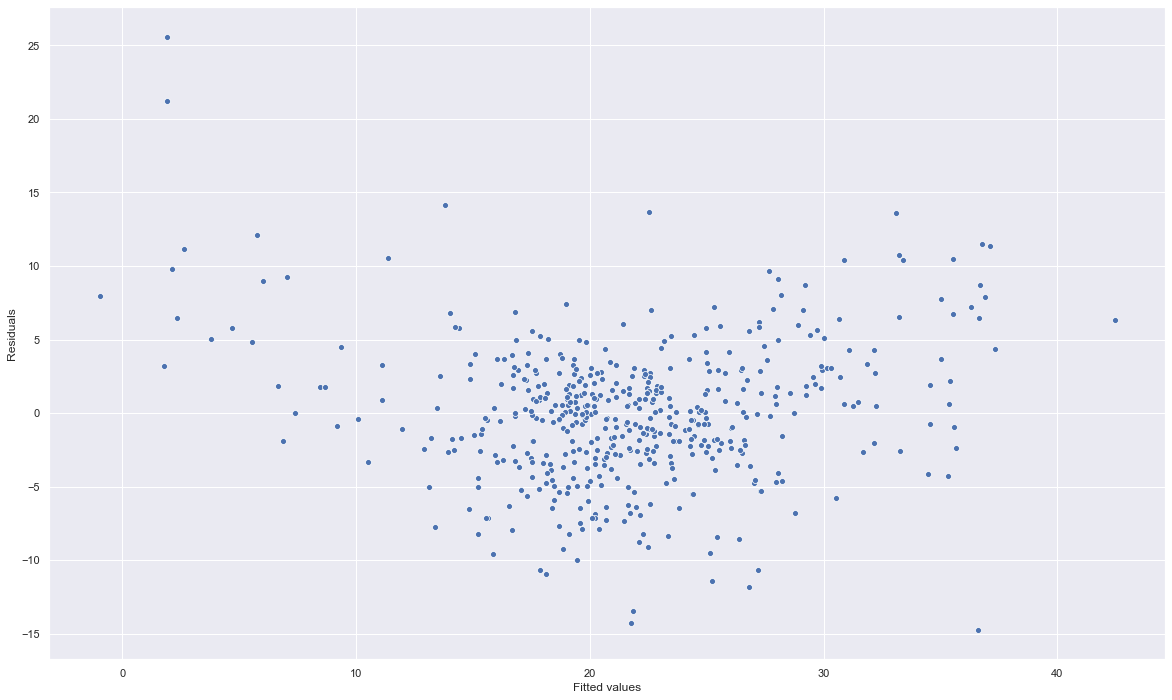

In [218]:
# residual = bos.PRICE - mod.fittedvalues
df = pd.concat([m.fittedvalues, m.resid], axis=1)
sns.scatterplot(data = df, x=0,y=1)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

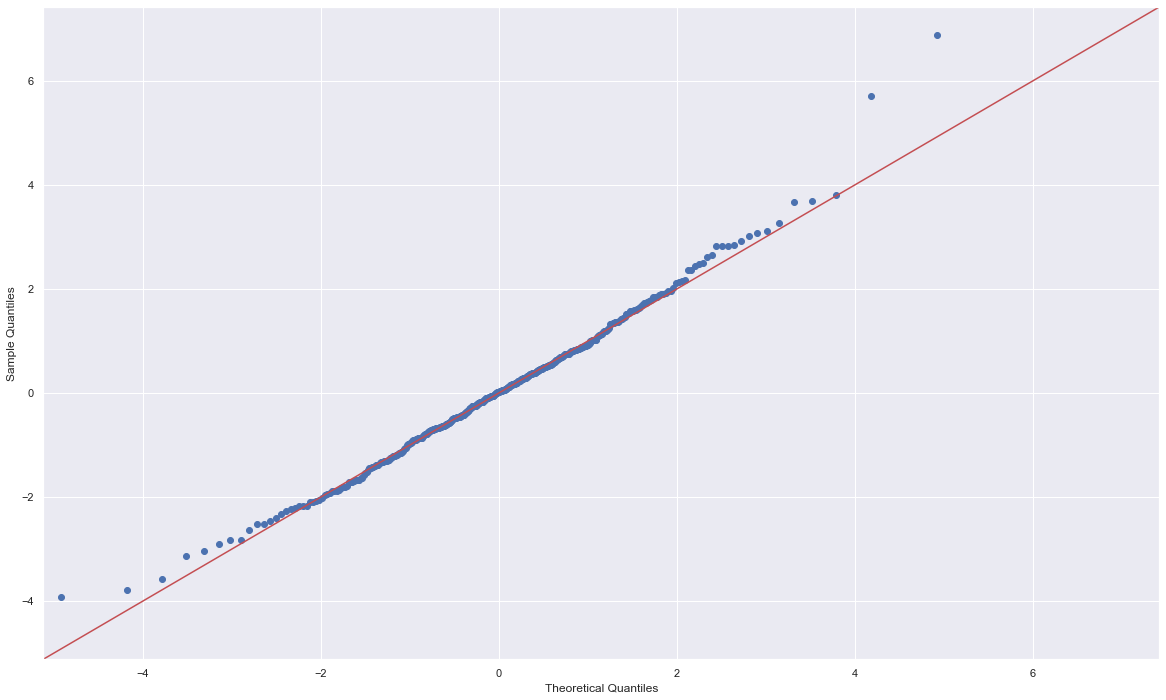

In [217]:
sm.qqplot(m.resid, stats.t, fit=True, line='45');

## We have a QQ plot where the data distribution seems to follow a more normal trend than before when the outliers were present